<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/Dataminning_week2/blob/main/multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 93.4 MB/s eta 0:0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
path = "/content/drive/MyDrive/students_dataset.csv"
data = pd.read_csv(path)

In [ ]:
from pycaret.classification import *

clf1 = setup(data, target='Grade', session_id=123)


,Description,Value
0,Session id,123
1,Target,Grade
2,Target type,Multiclass
3,Target mapping,"B: 0, C: 1, D: 2, F: 3"
4,Original data shape,"(1000, 6)"
5,Transformed data shape,"(1000, 10)"
6,Transformed train set shape,"(700, 10)"
7,Transformed test set shape,"(300, 10)"
8,Numeric features,4
9,Categorical features,1


In [ ]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8143,0.9563,0.8143,0.8019,0.8074,0.6941,0.6948
1,0.8571,0.9614,0.8571,0.8587,0.8443,0.7643,0.7738
2,0.9143,0.9822,0.9143,0.9009,0.9052,0.8604,0.8624
3,0.8429,0.9630,0.8429,0.8246,0.8335,0.7397,0.7405
4,0.8286,0.9696,0.8286,0.8224,0.8252,0.7189,0.7191
5,0.8286,0.9608,0.8286,0.7986,0.8124,0.7174,0.7196
6,0.8857,0.9813,0.8857,0.8907,0.8779,0.8118,0.8152
7,0.8857,0.9770,0.8857,0.8514,0.8672,0.8116,0.8142
8,0.8571,0.9542,0.8571,0.8220,0.8300,0.7629,0.7730


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf = tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8714,0.9454,0.8714,0.8488,0.8586,0.7872,0.7891
1,0.8143,0.9485,0.8143,0.8048,0.7856,0.6954,0.7116
2,0.9000,0.9675,0.9000,0.8864,0.8924,0.8374,0.8382
3,0.8857,0.9595,0.8857,0.8629,0.8737,0.8103,0.8115
4,0.9000,0.9853,0.9000,0.8641,0.8794,0.8349,0.8387
5,0.8429,0.9594,0.8429,0.8098,0.8240,0.7405,0.7439
6,0.8714,0.9710,0.8714,0.8366,0.8472,0.7869,0.7945
7,0.8714,0.9709,0.8714,0.8366,0.8472,0.7869,0.7945
8,0.7857,0.9238,0.7857,0.7555,0.7686,0.6461,0.6491


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


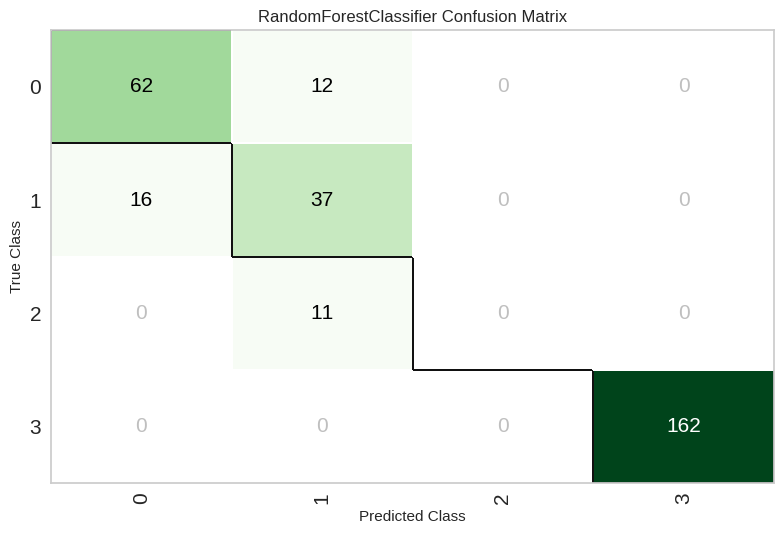

In [ ]:
plot_model(tuned_rf, plot='confusion_matrix')

In [ ]:
final_rf = finalize_model(tuned_rf)
save_model(final_rf, 'final_rf_multiclass_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Hours_Studied',
                                              'Attendance', 'Participation'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featu...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=5, max_f

In [ ]:
predictions = predict_model(final_rf, data=data)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8970,0.9797,0.8970,0.8911,0.8895,0.8308,0.8336


,Age,Hours_Studied,Attendance,Participation,Previous_Grade,Grade,prediction_label,prediction_score
0,19,10,91,50,A,3,F,1.0000
1,23,13,88,33,F,0,B,0.7129
2,16,10,50,92,C,3,F,1.0000
3,22,29,41,96,C,3,F,1.0000
4,19,9,97,48,D,1,C,0.9167
...,...,...,...,...,...,...,...,...
995,22,29,55,81,C,3,F,1.0000
996,17,12,77,42,B,0,B,0.7129
997,20,21,67,65,A,3,F,1.0000
998,20,10,87,75,B,3,F,1.0000
